In [3]:
import shap
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [5]:
lin_model.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
# Train an Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Create a SHAP explainer object
explainer = shap.Explainer(rf_model, X_train)

In [9]:
# Calculate SHAP values for the test data
shap_values = explainer(X_test, check_additivity=False)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


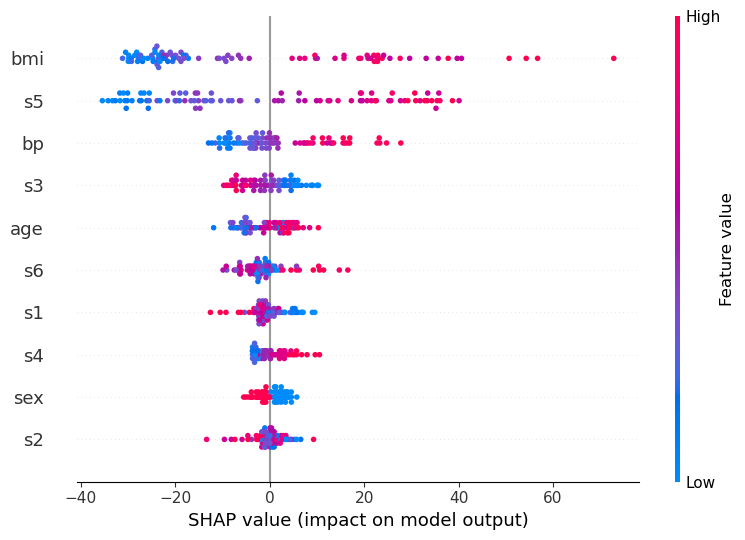

In [10]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test, feature_names=diabetes.feature_names)

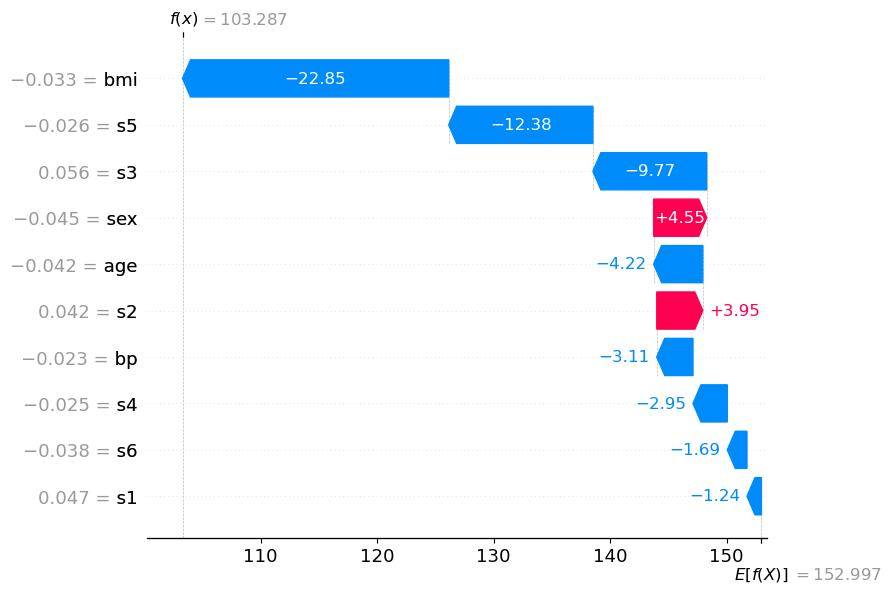

In [11]:
# Create an Explanation object
# We are going to look at the 10th value in the dataset.
explanation = shap.Explanation(values=shap_values[10], base_values=explainer.expected_value, data=X_test[10], feature_names=diabetes.feature_names)

# Plot the waterfall plot
shap.plots.waterfall(explanation)

In [14]:
shap.initjs()

In [15]:
shap_values = explainer.shap_values(X_test[10])

# Reshape shap_values to Explanation object
shap_values_expl = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test[10], feature_names=diabetes.feature_names)

# Plot the force plot
shap.force_plot(shap_values_expl.base_values, shap_values_expl.values, feature_names=diabetes.feature_names)

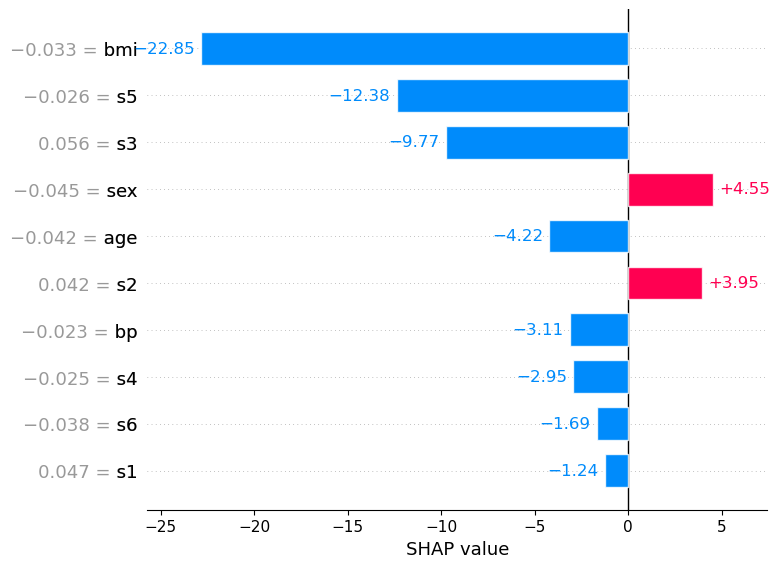

In [13]:
shap.plots.bar(explanation)